<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/Kursach12/%D0%BF%D1%83%D0%BD%D0%BA%D1%8212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ</h2> 
# <h2 style="text-align: center;">МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2> 
# </br>
# <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
# <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: right;">Студент: Барбашин Андрей Алексеевич</h5>
# <h5 style="text-align: right;">Группа: ТФэ-01-20</h5>

# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>
# </br>

# <h5 style="text-align: center;">Москва 2023</h5>





  Вариант №1

  $\space$ Дано:
 * Тип турбины: К-800-23,5 ЛМЗ
 * $P_0 = 25 \space МПа $ - Начальное давление
 * $t_0 = 560 ^\circ C$ -  Начальная температура
 * $P_{пп} = 3.62 \space МПа$ -  Давление промперегрева
 * $t_{пп} = 565 ^\circ C$ -  Температура промперегрева
 * $P_{к} = 3.5 \space кПа$ -  Давление в конденсаторе
 * $t_{п.в.} = 269^\circ C$ -  Температура питаталеьной воды

 * $N_{э} = 830 \space МВт$ -  Электрическая мощность
 * z = 9 -  Число отборов

1. Построение процесса расширения пара в турбине.

Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [1]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iapws: filename=iapws-1.5.3-py3-none-any.whl size=114282 sha256=4a26971c03af8b69416ee33c7ccfbcd6a72c156ec342dd24f73d556e88b9f6d2
  Stored in directory: /root/.cache/pip/wheels/54/ba/11/fdea0d216e8fb4c2e8e112cd6f9032ec3ff199b073973e1960
Successfully built iapws


In [2]:
!cp /content/drive/MyDrive/chast12.py /content

In [3]:
!cp /content/drive/MyDrive/compute_dop.py /content

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import iapws
from iapws import IAPWS97 as gas
import chast12
import compute_dop

In [5]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [6]:
p_0 = 25 * MPa #Начальное давление
t_0 = 560 #Начальная температура
p_middle = 3.62 * MPa #Давление промперегрева
t_middle = 565 #Температура промперегрева
p_k = 3.5 * kPa #Давление в конденсаторе
t_feed_water = 269 #Температура питательной воды
electrical_power = 830 * (10 ** 6) #Электричесская мощность
z = 9 #Число отборов шт.
avg_diam = 0.9# dр.с. = 0,9 - 1,1
rotation_speed = 50 #n
H_0 = 105
p_feed_water = 1.35 * p_0 #Давление питательной воды
ro = 0.1
internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

b2 = 34 # мм - принимаем это значение, поскольку значение из атласа не позволяет выполненить условие прочности для рабочих лопаток

In [7]:
chast12.get_coeff(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency,generator_efficiency)

Значение по оси абсцисс для расчета кси 0.6972895391608839


0.6972895391608839

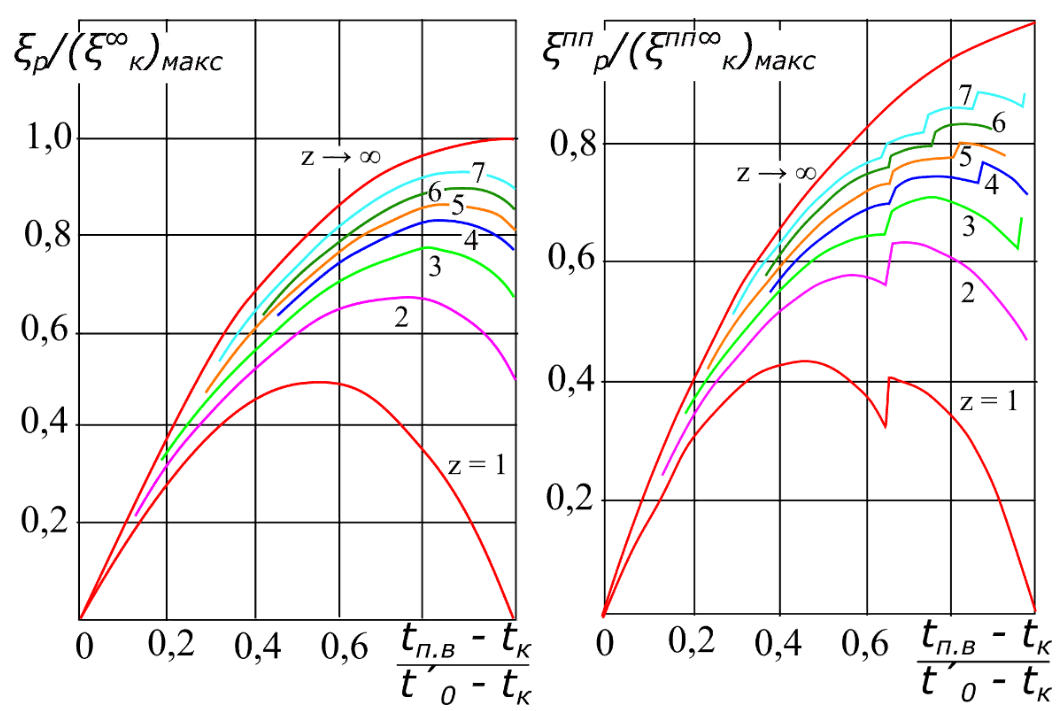


In [8]:
coef = chast12.coeff()

Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91


In [9]:
G_0 = chast12.get_inlet_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)
G_k = chast12.get_condenser_mass_flow(p_0, t_0, p_middle, t_middle, p_k, t_feed_water, electrical_power, p_feed_water, internal_efficiency, mechanical_efficiency, generator_efficiency)

print("Массовый расход в турбину на входе", G_0)
print("Массовый расход в конденсатор:", G_k)

Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91
Зная значение по оси абсцисс (ось x), определите значение по оси ординат (ось y), с учетом заданного количества подогревателей (z)
Введите коэффициент с графика 0.91
Массовый расход в турбину на входе 638.9600679191188
Массовый расход в конденсатор: 423.53443370021046


In [10]:
_point_0, point_0, point_1t, hp_heat_drop, point_1, _point_middle, point_middle, lp_heat_drop, point_2, point_2t, point_k_water, point_feed_water = chast12.get_points(p_0, t_0, p_middle, t_middle, p_k, p_feed_water, t_feed_water, internal_efficiency)

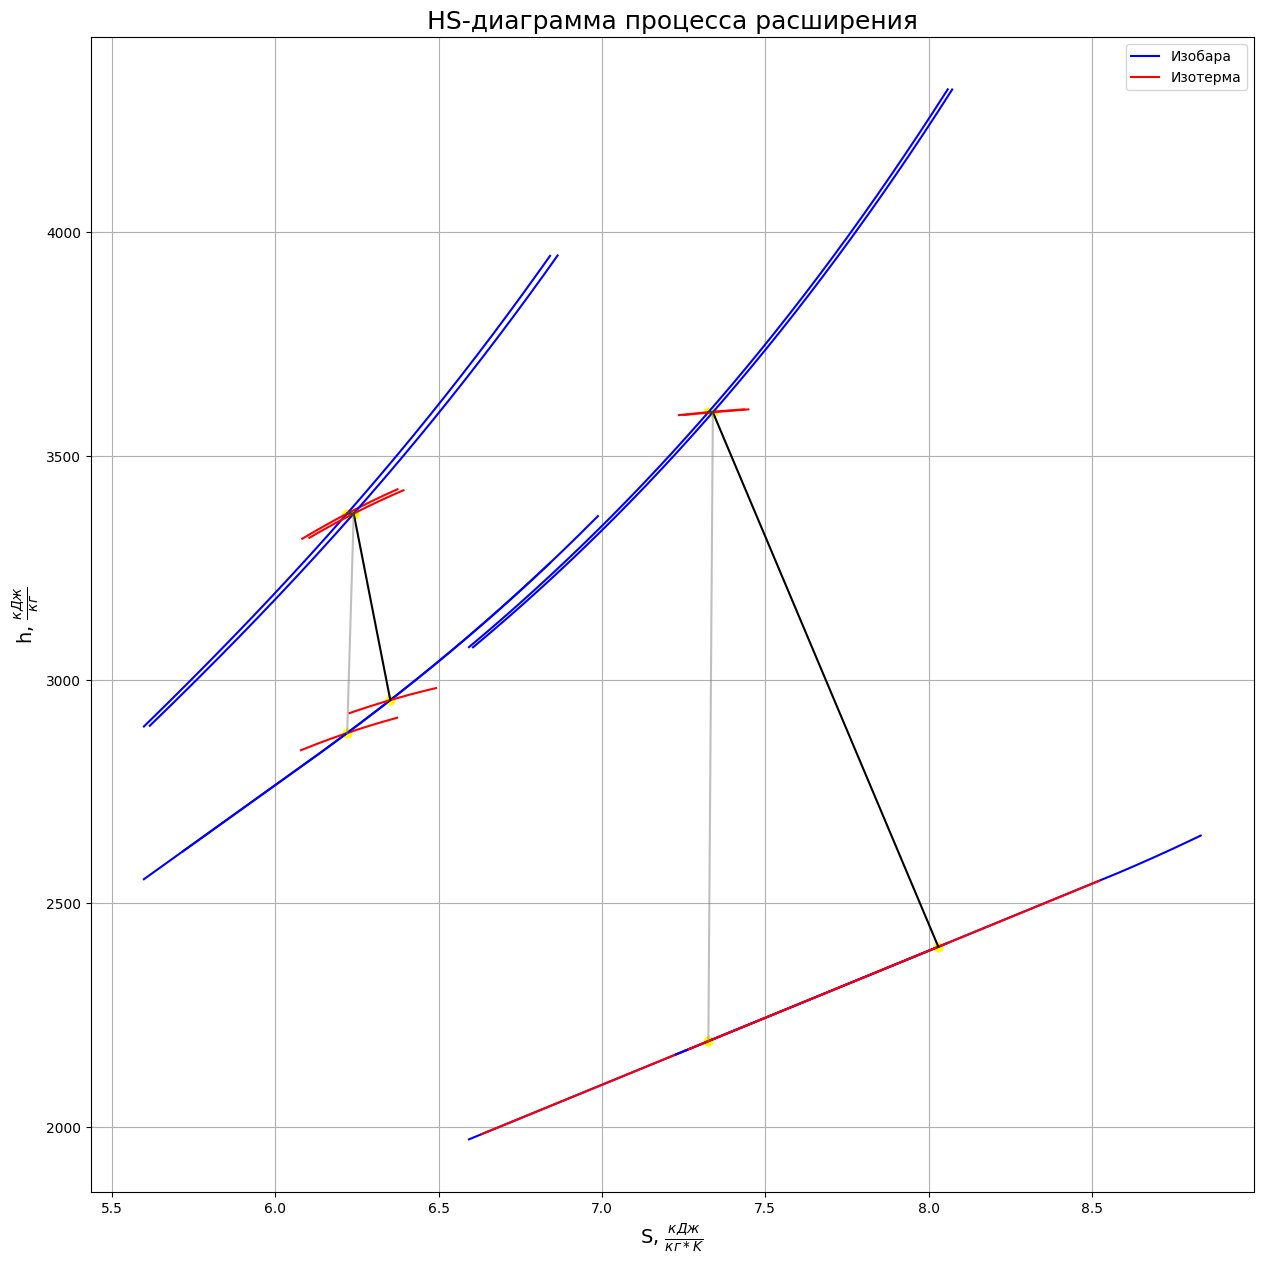

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

chast12.plot_hs([_point_0, point_0, point_1t, point_1], ax = ax)
chast12.plot_hs([_point_middle, point_middle, point_2t, point_2], ax = ax)
chast12.plot_process([_point_0, point_0, point_1], ax = ax, color='black')
chast12.plot_process([_point_middle, point_middle, point_2], ax = ax, color='black')
chast12.plot_process([_point_0, point_0, point_1t], ax=ax, alpha=0.5, color='grey')
chast12.plot_process([_point_middle, point_middle, point_2t], ax=ax, alpha=0.5, color='grey')
ax.grid()

2. Проведение расчета регулирующей ступени и определение зависимости ηол от U/cф. Диапазон варьируемого параметра для дан в задании. Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВДв рамках заданного диапазона.


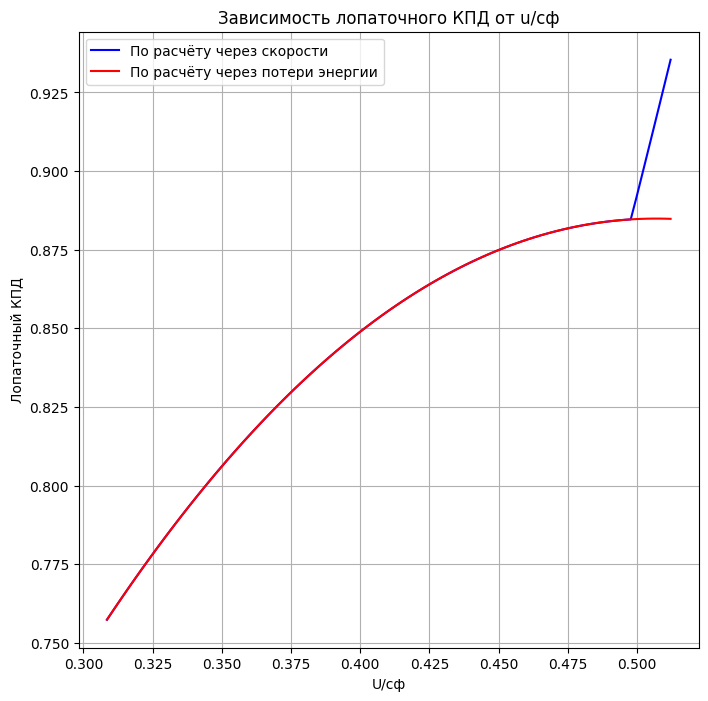

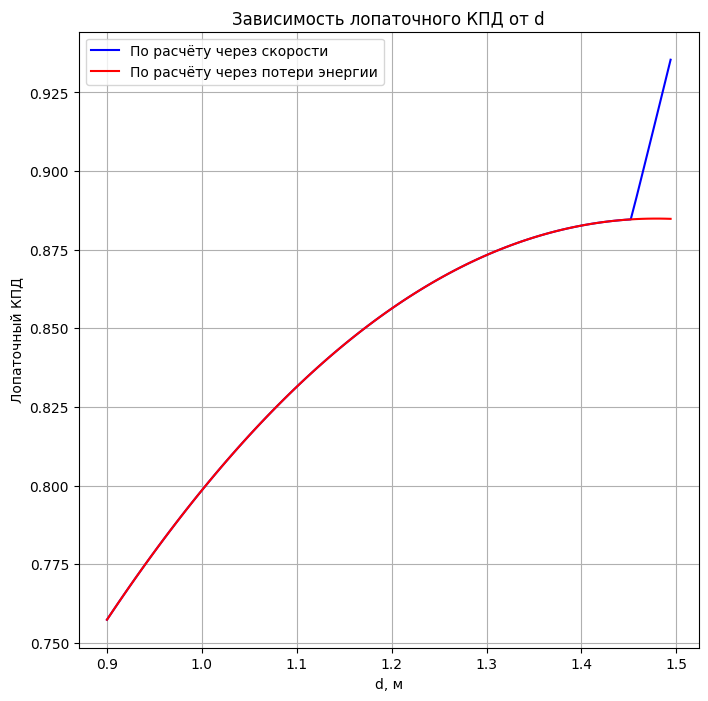

In [12]:
chast12.efficiency_graph_from_U_cf_and_avg_diameter(G_0, H_0, ro, point_0, rotation_speed)

Из графика видно, что для заданного диапазона диаметров от 0,9 до 1,1 КПД по обоим спопосбам расчета полностью сходится. Далее наблюдается сильное расхождение, связанное с возможной необходисомтью подбора других профмлей рабочей и сопловой решетки. (программно данная возможность не учтена)

По графикам видно, что оптимальное значение u/сф составляет около 0,5, а по диаметру - 1,45 м.

Исходя из заданного диапазона оптимальным значением диаметра будет 1,1 м.


In [13]:
avg_diameter = 1.1

Окончательные параметры регулирующей ступени для оптимального диаметра

,,,,,,,
Name,Теплоперепад в сопловой решётке,Теплоперепад в рабочей решётке,Теоретическая энтальпия пара за сопловой решёткой,Теоретическая абсолютная скорость на выходе из...,Скорость звука на выходе из сопловой решётки,Число Маха на выходе из сопловой решётки,Предварительная площадь выхода потока из сопло...
Parameters,Ho_c,Ho_p,h1t,c1t,a1t,M1t,F1_
Value,94.5,10.5,3276.793152,434.741302,652.66035,0.666107,0.026208


,,,,,,,,
Name,Угол выхода потока из решётки,Угол входа потока в решётку,Оптимальный шаг решётки,Число Маха предварительное,Хорда сопловой решётки,Площадь поперечного сечения сопловой решётки,Момент инерции сопловой решётки,Момент сопротивления сопловой решётки
Parameters,alpha1_e,alpha0,t_opt,M1t_,b1,f1,I1_min,W1_min
Value,15,90,"[0.7, 0.85]",0.85,51.5,3.3,0.36,0.45


,,,,,,,,
Name,Произведение el1,Оптимальное значение степени парциальности,Высота сопловых лопаток,Уточняем коэффициент расхода сопловой решетки,Выходная площадь сопловой решетки (предварител...,Количество лопаток в сопловой решетке (предвар...,Оптимальный относительный шаг,Количество лопаток в сопловой решетке
Parameters,el1,e_opt,l1,mu1,F1,z_1,t1opt,z1
Value,0.029301,0.684707,0.042794,0.975983,0.026047,61.0,0.7532,61.260262


,,,,,,,,,,
Name,Угол установки профиля решётки,Отношение: b1/l1,Коэффициент профильных потерь,Коэффициент суммарных потерь,Коэффициент концевых потерь,Коэффициент скорости сопловой решетки,Коэффициент скорости сопловой решетки (уточ),расхождение между fi и fi_,Скорость выхода пара из сопловой решетки,Реальный угол выхода потока из сопловой решётки
Parameters,alpha_ust,b1_l1,ksi_noz,ksi_sum,ksi_end_noz,fi,fi_,delta_fi,c_1,alpha_1
Value,38.048801,1.203434,0.0198,0.059,0.0392,0.970052,0.970373,-0.000331,421.721472,15.093891


,,,,,,,
Name,Относительная скорость на выходе из сопловой р...,Угол направления относительной скорости потока...,Теоретическая относительная скорость на выходе...,Высота рабочих лопаток,Скорость звука за рабочей решеткой (теоретичес...,Теоретическое число Маха за рабочей решёткой,Потери в сопловой решетке
Parameters,w_1,beta_1,w2t,l2,a2t,M2t,delta_Hc
Value,258.83571,25.104638,296.641071,0.046794,627.819601,0.472494,5.5755


,,,,,,,,
Name,Угол входа потока в рабочую решётку по атласу,Угол выхода потока из рабочей решётки по атласу,Оптимальный шаг рабочей решётки,Число Маха предварительное,Хорда рабочей решётки по атласу,Площадь поперечного сечения рабочей решётки,Момент инерции рабочей решётки,Момент сопротивления рабочей решётки
Parameters,beta0,beta2_e,t_opt,M2t_,b2_atl,f2,I2_min,W2_min
Value,50,28,"[0.45, 0.58]",0.85,25.6,1.22,0.071,0.112


,,,,,,,
Name,Коэффициент расхода рабочей решётки,Выходная площадь рабочей решётки,Эффективный угол выхода потока из рабочей решётки,Количество лопаток в рабочей решётке,Оптимальный шаг рабочей решётки,Угол установки рабочих лопаток,Отношение b2/l2
Parameters,mu2,F2,beta2_e,z_2,t2opt,beta2_ust,b2_l2
Value,0.959529,0.04005,20.724639,245.0,0.55,68.849639,0.547076


,,,,,,,,,,
Name,Коэффициент профильных потерь в решётке,Коэффициент суммарных потерь,Коэффициент концевых потерь,Коэффициент скорости рабочей решётки,Коэффициент скорости рабочей решётки (уточ),расхождение между psi и psi_,Угол направления относительной скорости на вых...,Абсолютная скорость на выходе из рабочей решётки,Угол выхода абсолютной скорости из рабочей реш...,Действительная относительная скорость на выход...
Parameters,ksi_grid,ksi_sum_g,ksi_end_grid,psi,psi_,delta_psi,beta_2,c_2,alpha_2,w_2
Value,0.046,0.051,0.005,0.974166,0.952341,0.022404,20.399263,140.580737,45.766253,288.977737


,,,
Name,Фиктивная скорость,Отношение скоростей,Оптимальное отношение скоростей
Parameters,cf,u_cf,u_cf_opt
Value,458.257569,0.377053,0.511257


,,,,,,
Name,Потери в рабочей решётке,Потери с выходной скоростью,Располагаемая энергия ступени,Лопаточный КПД по расчёту через потери энергии,Лопаточный КПД по расчёту через скорости,Расхождение eff и eff_
Parameters,delta_Hp,delta_Hvc,E0,eff,eff_,delta_eff
Value,2.243896,9.881472,105.0,0.83142,0.83142,0.0


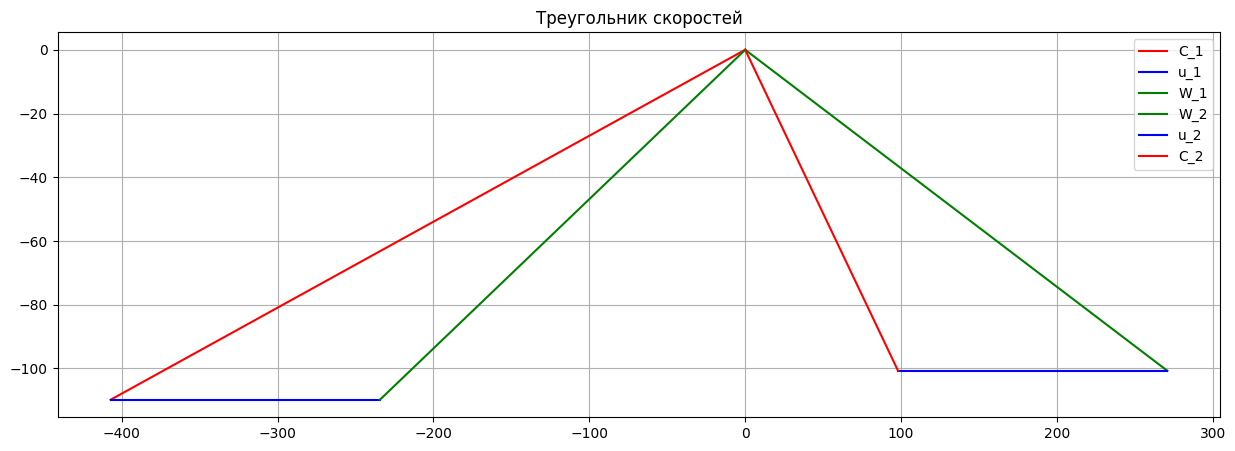

In [14]:
chast12.main(G_0, H_0, ro, point_0, rotation_speed, avg_diameter)

In [15]:
point_1_t, point_1_, point_2_t, point_2_, point_t_konec = chast12.graff(G_0, H_0, ro, point_0, rotation_speed, avg_diameter)

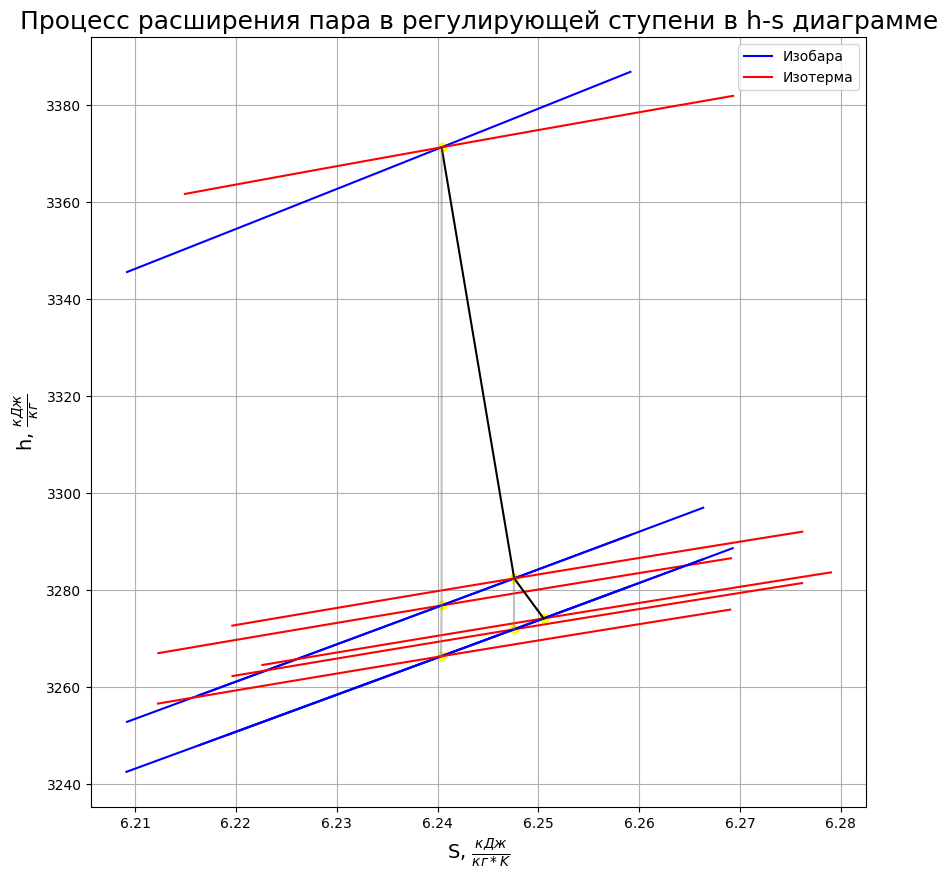

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

compute_dop.plot_hs([point_0, point_1_t, point_1_, point_2_t, point_2_, point_t_konec], ax = ax)
compute_dop.plot_process([point_0, point_1_], ax = ax, color='black')
compute_dop.plot_process([point_1_, point_2_], ax = ax, color='black')
compute_dop.plot_process([point_0, point_1_t, point_t_konec], ax=ax, alpha=0.5, color='grey')
compute_dop.plot_process([point_1_, point_2_t], ax=ax, alpha=0.5, color='grey')
ax.grid()

Расчёт внутреннего КПД регулирующей ступени и сопутствующих параметров и их вывод в удобной форме

In [17]:
chast12.main2(G_0, H_0, ro, point_0, rotation_speed, avg_diameter)

,,,,,,,,,,,,
Name,Периферийный диаметр,Радиальный зазор в периферийном уплотнении,Эквивалентный зазор в уплотнении по бандажу (п...,Относительные потери от утечек через бандажные...,Абсолютные потери от утечек через периферийное...,Относительные потери от трения диска,Абсолютные потери от трения диска,Коэффициент вентиляционных потерь,Ширина рабочей решетки,Коэффициент сегментных потерь,"Относительные потери в ступени, связанные с па...",Абсолютные потери от парциальности
Parameters,peripheral_diameter,delta_r,delta_e,ksi_bandage,deltaH_y,ksi_friction,deltaH_tr,ksi_v,B2,ksi_segment,ksi_partiality,deltaH_partiality
Value,1.146794,0.001147,0.000338,0.016336,1.71525,0.001743,0.183031,0.006199,23.875501,0.013447,0.019646,2.062801


,,,
Name,Использованный теплоперепад ступени,Внутренний относительный КПД ступени,Внутренняя мощность ступени
Parameters,H_i,internal_eff,N_i
Value,83.338051,0.793696,53249.68646


Проверка рабочих лопаток на прочность

In [18]:
chast12.endurance(G_0, H_0, ro, point_0, rotation_speed, avg_diameter)

,,,,
Name,Момент сопротивления профиля рабочей лопатки,Напряжение изгиба лопатки,угловая скорость рабочего колеса,Напряжение растяжения лопатки
Parameters,W2_min_,sigma_bending,omega,sigma_stretching
Value,0.112,402.016724,314.159265,19812941.786563
